# Mean-Shift

- 1) Begin with a circular sliding window centered at a point C (randomly selected) and having radius $r$ as the kernel.
- 2) At every iteration the sliding window is shifted towards regions of higher density by shifting the center point to the mean of the points within the window.
- 3) Continue shifting the sliding window according to the mean until there is no direction at which a shift can accommodate more points inside the kernel.

![](https://cdn-images-1.medium.com/max/1800/1*bkFlVrrm4HACGfUzeBnErw.gif)

- 4) This process of steps 1 to 3 is done with many sliding windows until all points lie within a window. When multiple sliding windows overlap the window containing the most points is preserved.

![](https://cdn-images-1.medium.com/max/1800/1*vyz94J_76dsVToaa4VG1Zg.gif)

Source: https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth

### Generating data

In [2]:
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=10)

In [3]:
points = data[0]
labels = data[1]

<IPython.core.display.Javascript object>


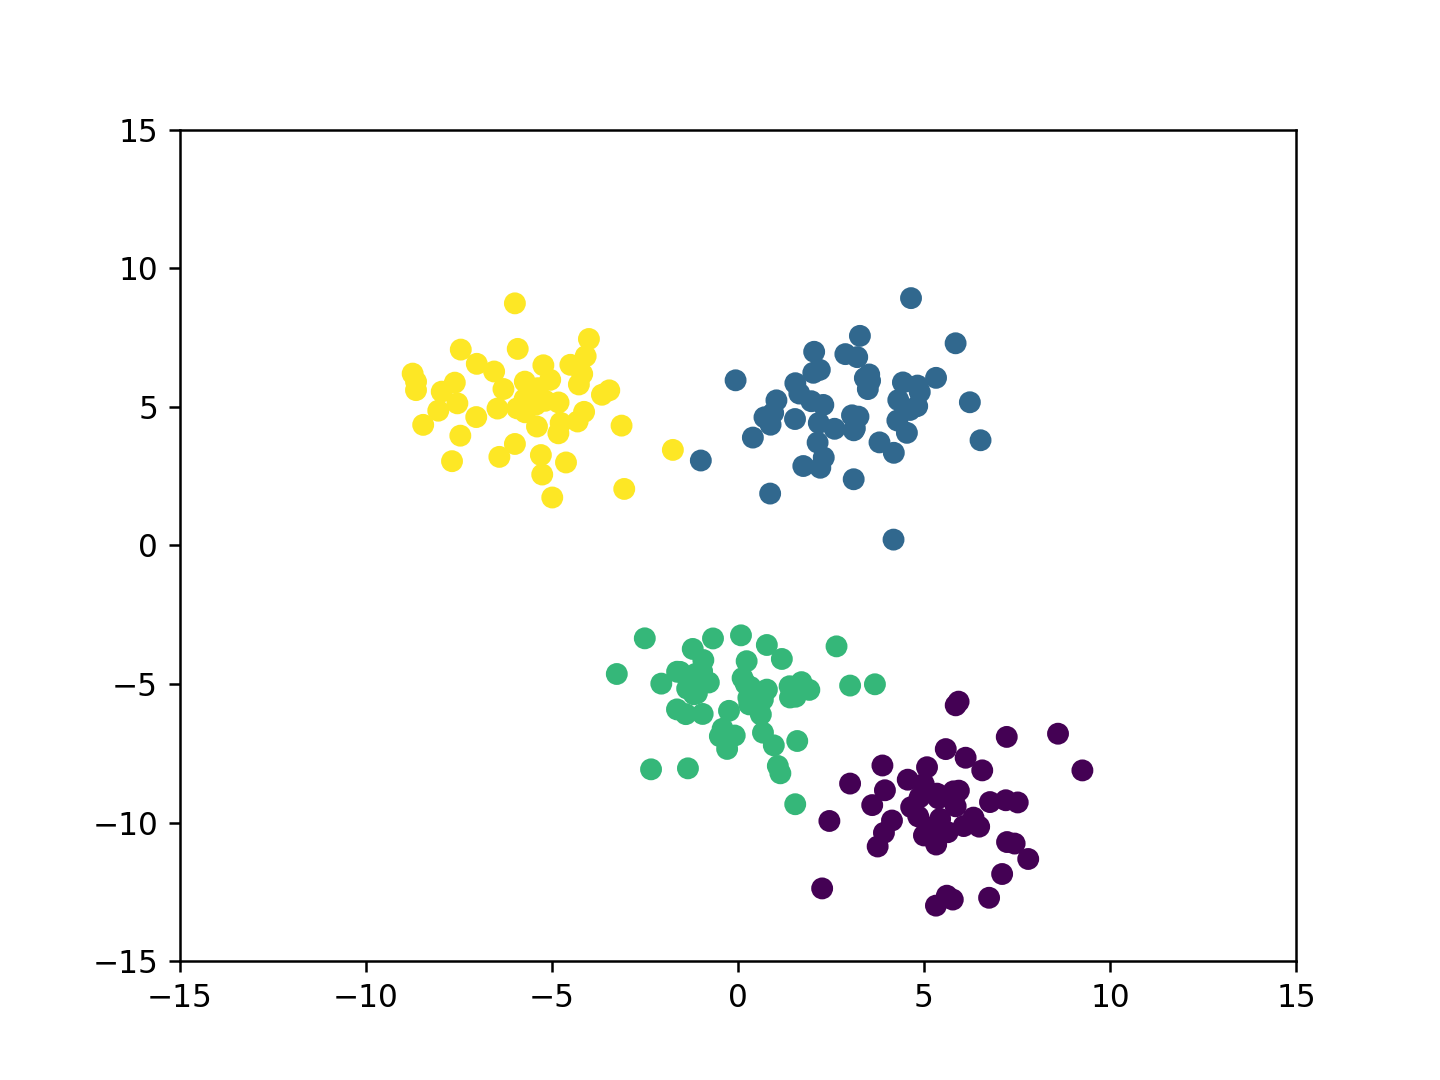

In [4]:
plt.figure()
plt.scatter(points[:,0], points[:,1], c=labels)
plt.axis([-15, 15, -15, 15])
plt.show()

### Applying Mean-Shift

In [5]:
bandwidth = estimate_bandwidth(points, quantile=0.2, n_samples=500)

Source: https://saravananthirumuruganathan.wordpress.com/2010/04/01/introduction-to-mean-shift-algorithm/

In [6]:
bandwidth

3.553872282678686

In [7]:
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(points)

MeanShift(bandwidth=3.553872282678686, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [8]:
predicted_labels = mean_shift.labels_
centers = mean_shift.cluster_centers_

<IPython.core.display.Javascript object>


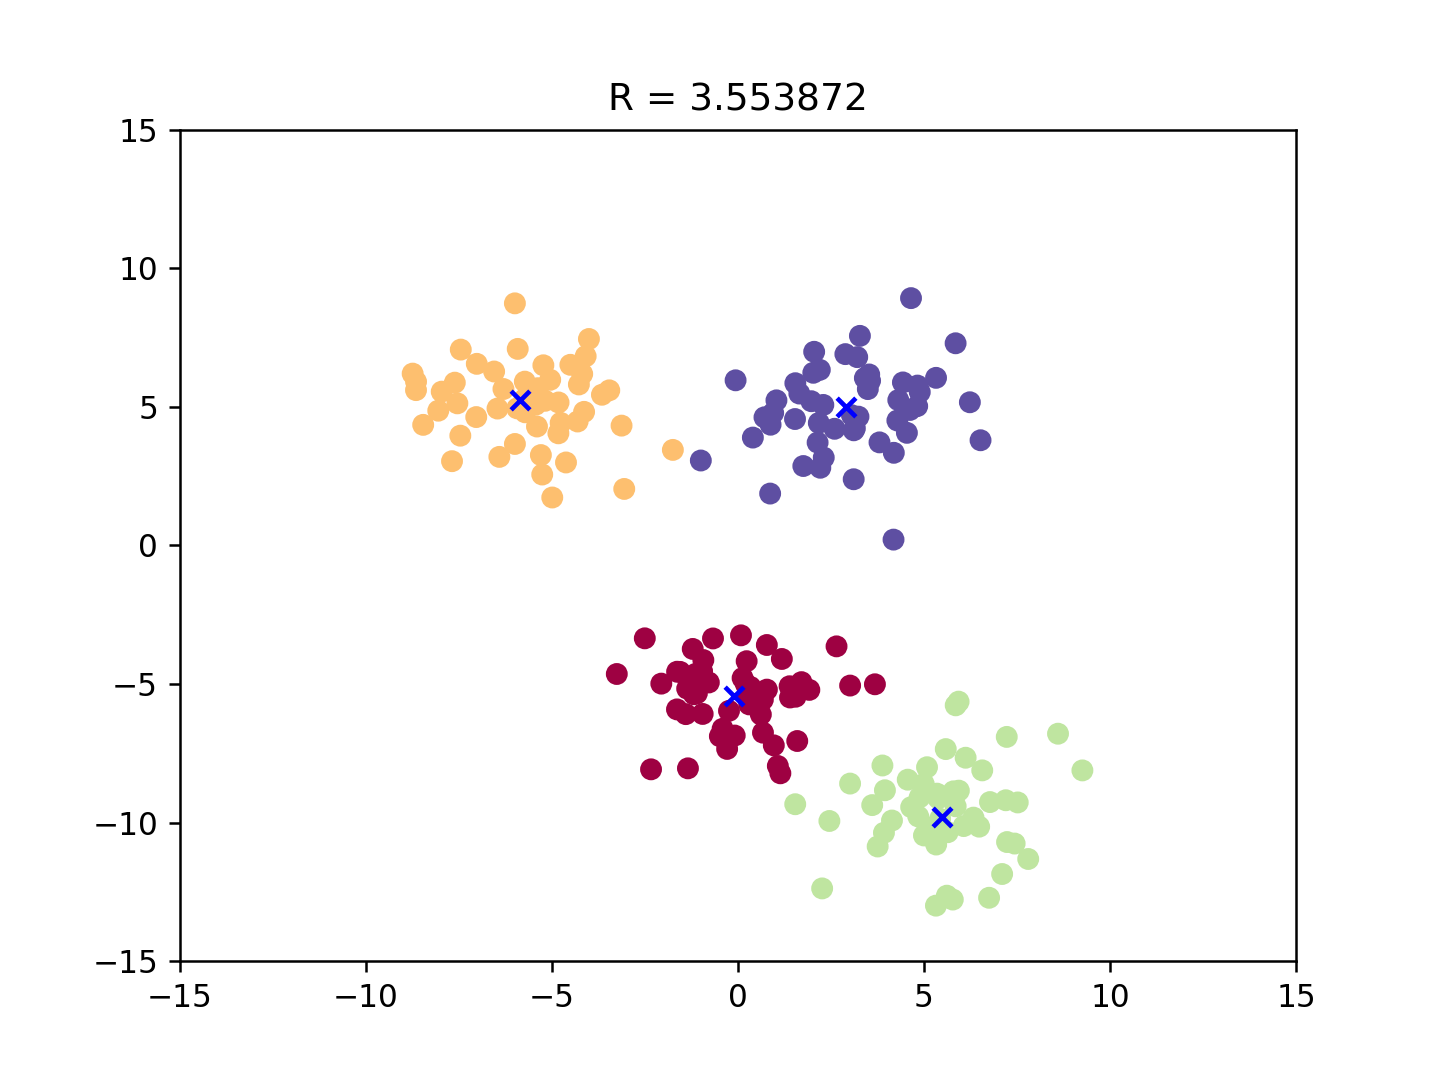

In [9]:
plt.figure()
plt.title('R = %f' % bandwidth)
plt.scatter(points[:,0], points[:,1], c=predicted_labels, cmap='Spectral')
plt.scatter(centers[:,0], centers[:,1], c='b', marker='x')
plt.axis([-15, 15, -15, 15])
plt.show()

### Decreasing $r$

In [10]:
bandwidth = 2

In [11]:
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(points)

MeanShift(bandwidth=2, bin_seeding=True, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [12]:
predicted_labels = mean_shift.labels_
centers = mean_shift.cluster_centers_

<IPython.core.display.Javascript object>


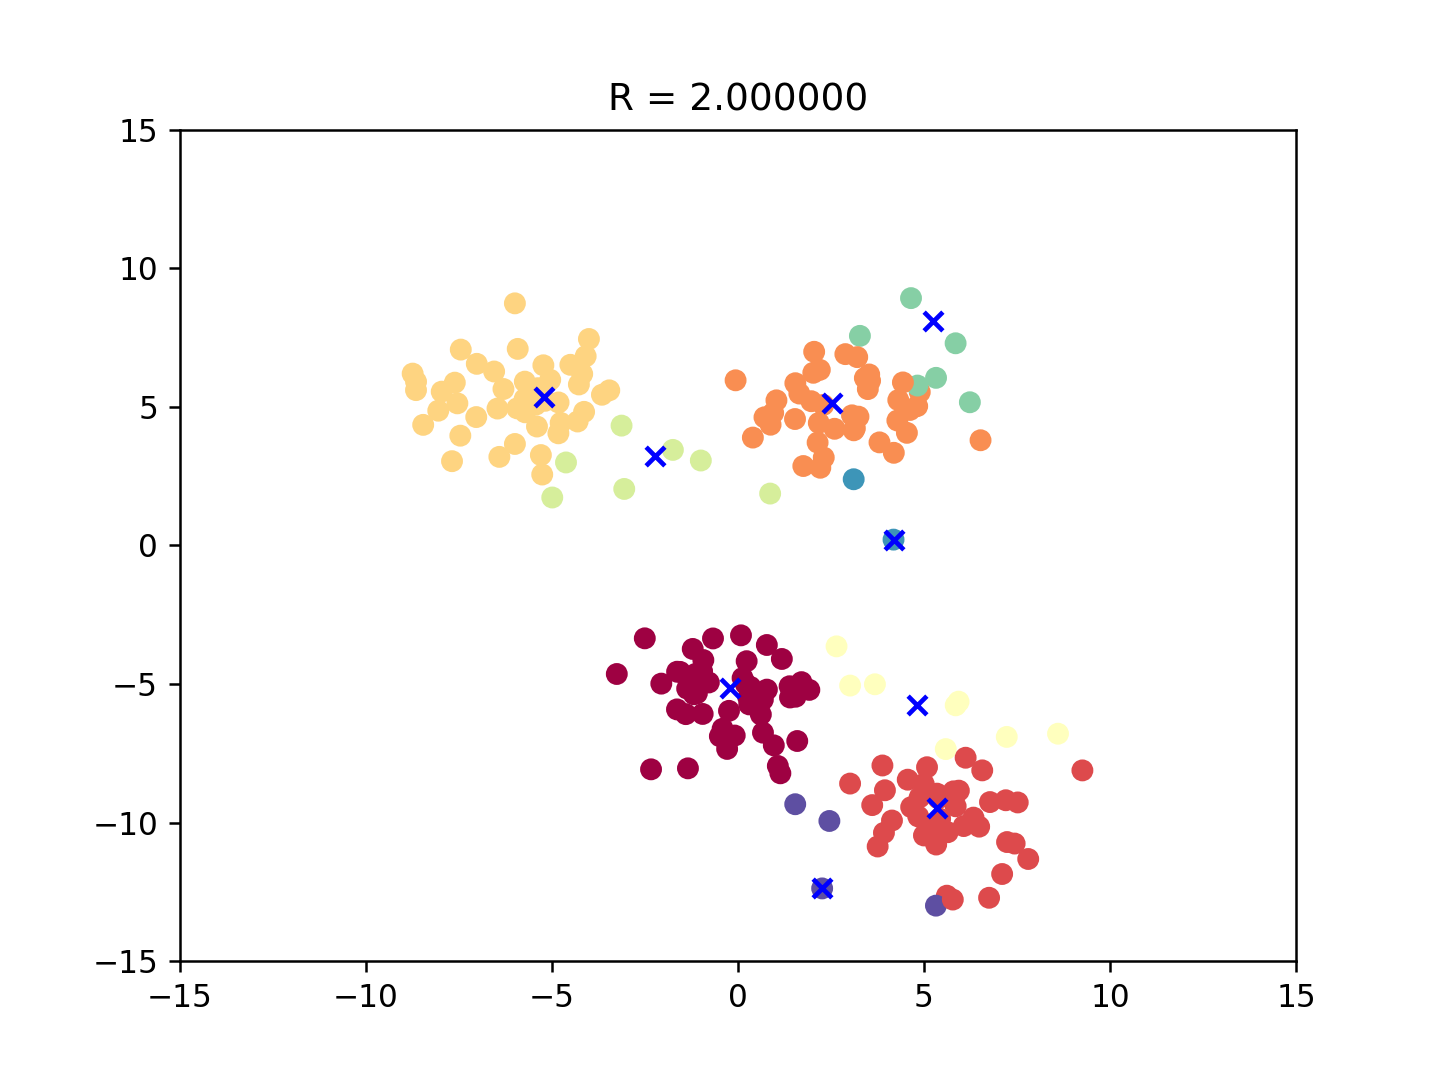

In [13]:
plt.figure()
plt.title('R = %f' % bandwidth)
plt.scatter(points[:,0], points[:,1], c=predicted_labels, cmap='Spectral')
plt.scatter(centers[:,0], centers[:,1], c='b', marker='x')
plt.axis([-15, 15, -15, 15])
plt.show()

### Increasing $r$

In [14]:
bandwidth = 5

In [15]:
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(points)

MeanShift(bandwidth=5, bin_seeding=True, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [16]:
predicted_labels = mean_shift.labels_
centers = mean_shift.cluster_centers_

<IPython.core.display.Javascript object>


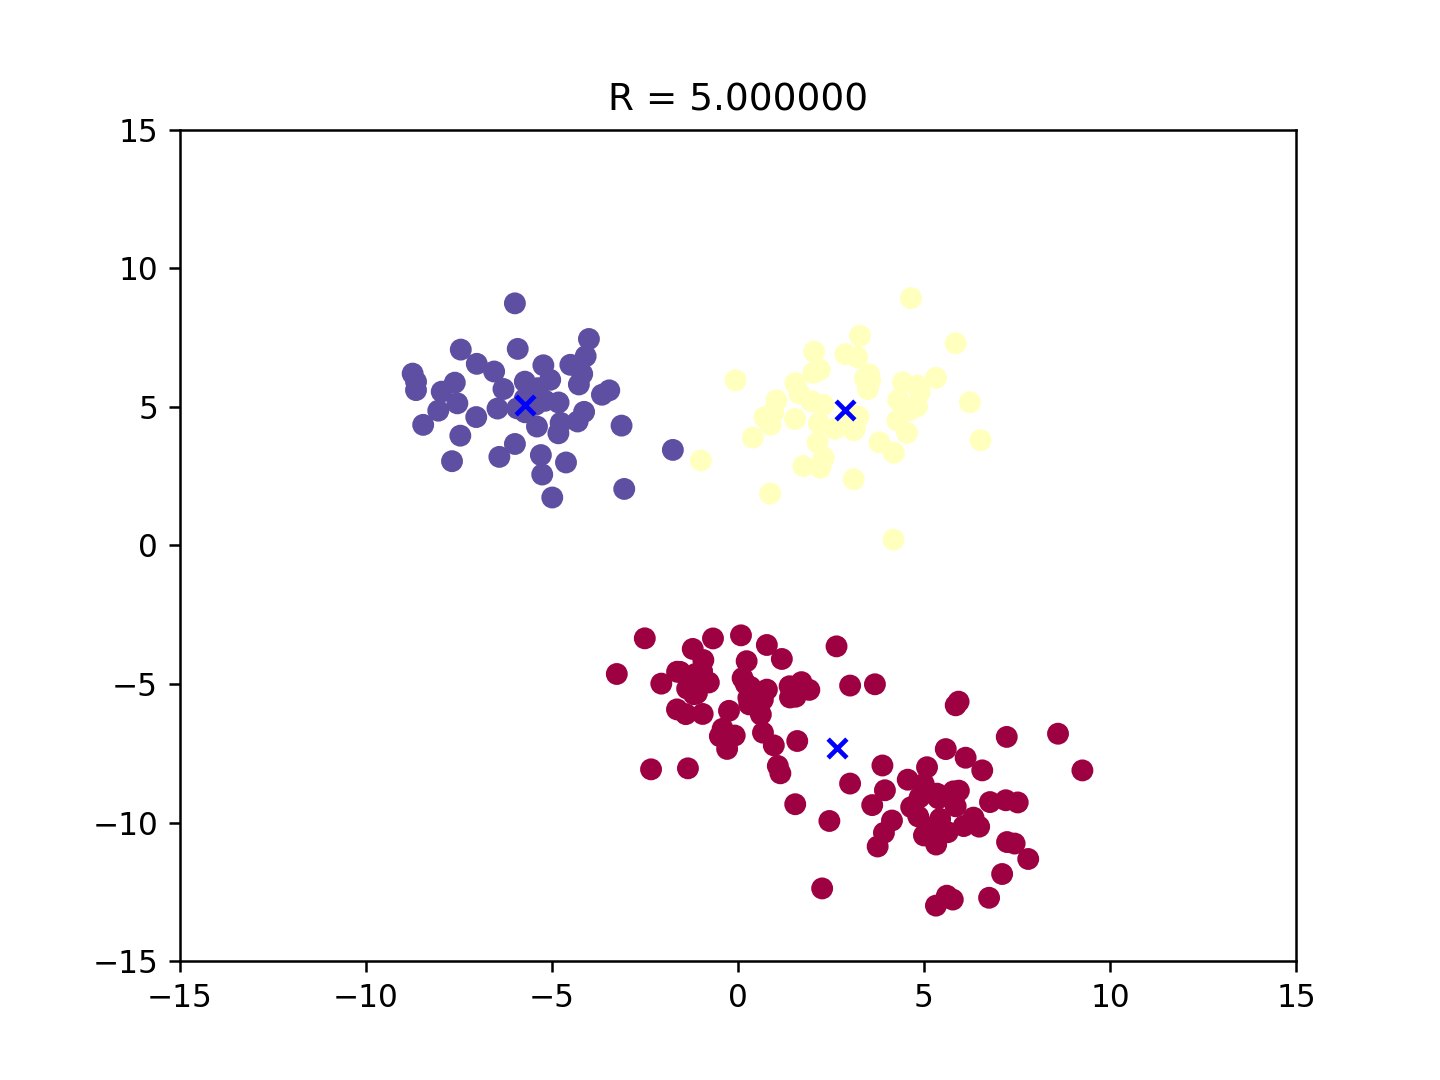

In [17]:
plt.figure()
plt.title('R = %f' % bandwidth)
plt.scatter(points[:,0], points[:,1], c=predicted_labels, cmap='Spectral')
plt.scatter(centers[:,0], centers[:,1], c='b', marker='x')
plt.axis([-15, 15, -15, 15])
plt.show()

### Pros

- There is no need to select the number of clusters as mean-shift automatically discovers this;
- It can handle arbitrarily shaped clusters.

### Cons

- Choosing $r$ can be non-trivial;
- The choice of $r$ in influences convergence rate and the number of clusters.
- $O(Tn^2)$ whre $T$ is the number of iteracitons and $n$ is the number of samples.

Source: https://spin.atomicobject.com/2015/05/26/mean-shift-clustering/

#### Done!